# Graphs

- there is a lot of graph specific info, if any of this info here is not sufficient look at course here: https://leetcode.com/explore/interview/card/leetcodes-interview-crash-course-data-structures-and-algorithms/707/traversals-trees-graphs/4721/

- Directed vs Undirected Edges: Edges of a node can either be directed or undirected. Directed edges mean that you can only traverse in one direction.
  - In binary trees, the edges were directed. We call binary trees directed graphs. You can't access a node's parent, only its children.

- Another important term is connected component. A connected component of a graph is a group of nodes that are connected by edges. 

- Indegree: The number of edges that can be used to reach the node is the node's indegree.
  - In binary trees, all nodes except the root had an indegree of 1 (due to their parent). All nodes have an outdegree of 0, 1, or 2. An outdegree of 0 means that it is a leaf. Specific to trees, we used the parent/child terms instead of "neighbors".

- Outdegree: The number of edges that can be used to leave the node is the node's outdegree

- Neighbors: Nodes that are connected by an edge are called neighbors. 

- Cyclic vs Acyclic:  Cyclic means that the graph has a cycle, acyclic means that it doesn't. We learned what a cycle was in the linked list chapter - it's when you have a path in the edges that leads to visiting the same node multiple times. Here's an example of a graph with and without a cycle:
  - Binary trees by definition cannot have a cycle.




# How are graphs given in algorithm problems?

- In graph problems, only information about a graph is given. 
- YOU ARE NOT GIVEN A GRAPH IN MEMORY LIKE WITH LLs and BTs! Only information: An important thing to understand is that with linked lists and binary trees, you are literally given objects in memory that contain data and pointers. With graphs, the graph doesn't literally exist in memory. You are only given information about the graph, and it's up to you to figure out how to represent and traverse the graph with code.

- Note on traversal for graphs: Before we start our traversal, we need to make sure that for any given node, we can immediately access all the neighbors of said node.

- The problem statement may or may not explicitly state the input is a graph. 
- (sometimes the problem will state which node you should start from, sometimes you will need to figure this out yourself)

- Before starting the traversal, we can pre-process the input so that we can easily find all neighbors of a given node. Ideally, you want a data structure where you can give node as an argument and be returned a list of neighbors. The easiest way to accomplish this is using a hash map.
    - Let's say you had a hash map graph that mapped integers to lists of integers. We can iterate over the input and for each [x, y] pair, we can put y in the list associated with graph[x]. If the edges are undirected, we will also need to put x in the list associated with graph[y]. After building this hash map, we can do graph[0] and immediately have all the neighbors of node 0.


# First input format: array of edges

Here's some example code for building graph from an array of edges:

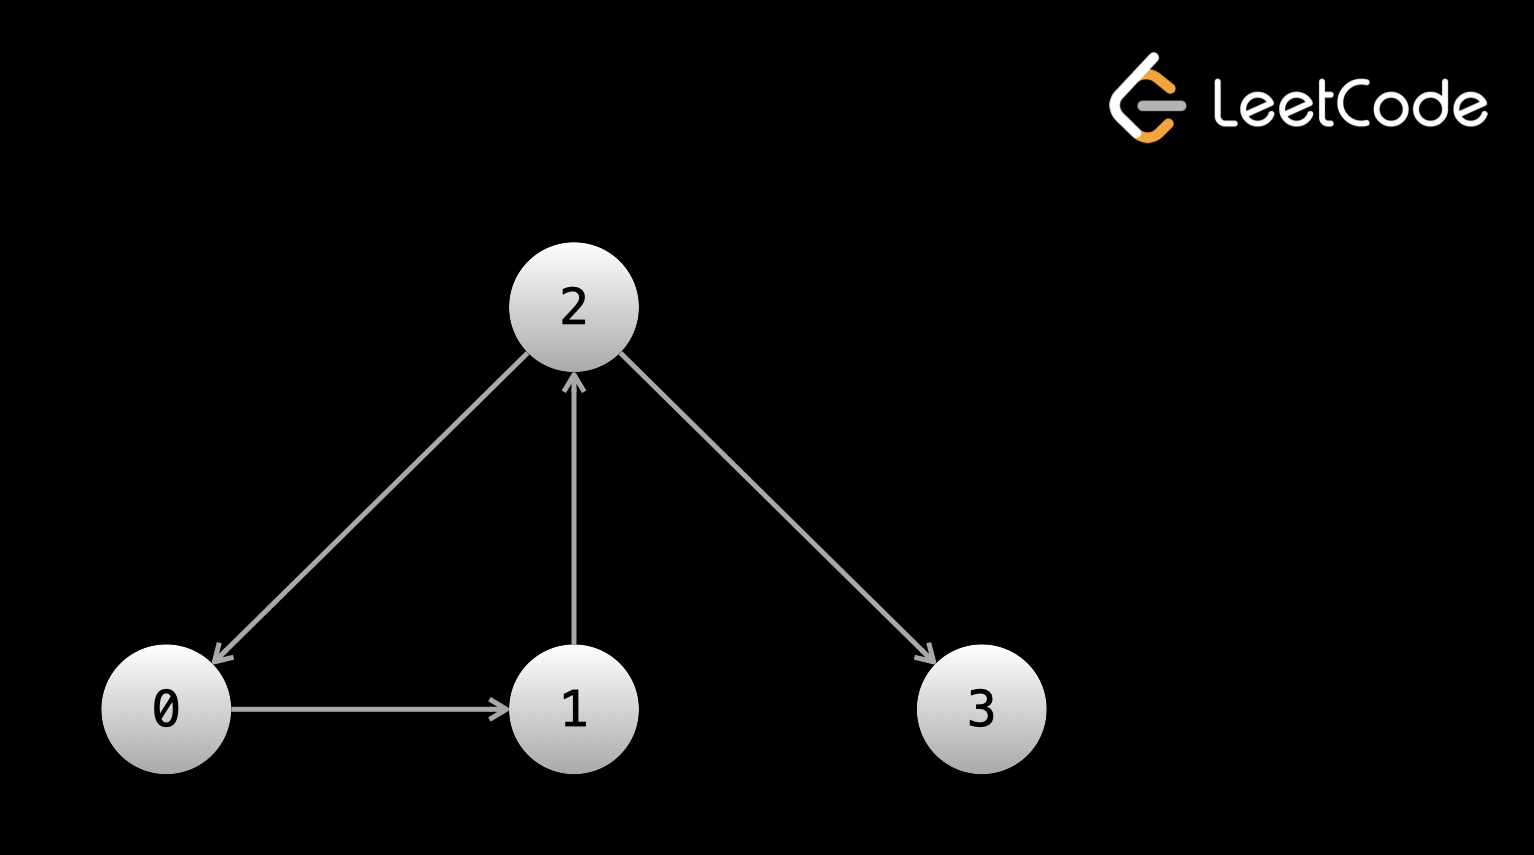

This example graph can be represented by an array of directed edges: edges = [[0, 1], [1, 2], [2, 0], [2, 3]].

In [5]:
from collections import defaultdict

def build_graph(edges):
    graph = defaultdict(list)
    for x, y in edges:
        graph[x].append(y)
        # graph[y].append(x)
        # uncomment the above line if the graph is undirected
    
    return graph
edges = [[0, 1], [1, 2], [2, 0], [2, 3]]
graph_test = build_graph(edges)
print(graph_test) # key is the vertex, list are the edges for said vertex

defaultdict(<class 'list'>, {0: [1], 1: [2], 2: [0, 3]})


# Second input format: adjacency list

In an adjacency list, the nodes will again be numbered from 0 to n - 1. The input will be a 2D integer array, let's call it graph. graph[i] will be a list of all the outgoing edges from the i th node. 
- The above graph can be represented by the adjacency list graph = [[1], [2], [0, 3], []].

Notice that with this input, we can already access all the neighbors of any given node. We don't need to do any pre-processing! This makes an adjacency list the most convenient format.

# Third input format: adjacency matrix

The next format is an adjacency matrix. Once again, the nodes will be numbered from 0 to n - 1. You will be given a 2D matrix of size n x n, let's call it graph. If graph[i][j] == 1, that means there is an outgoing edge from node i to node j. 
- NOTE: i represents the vertex and j represents where the edge points

For example:

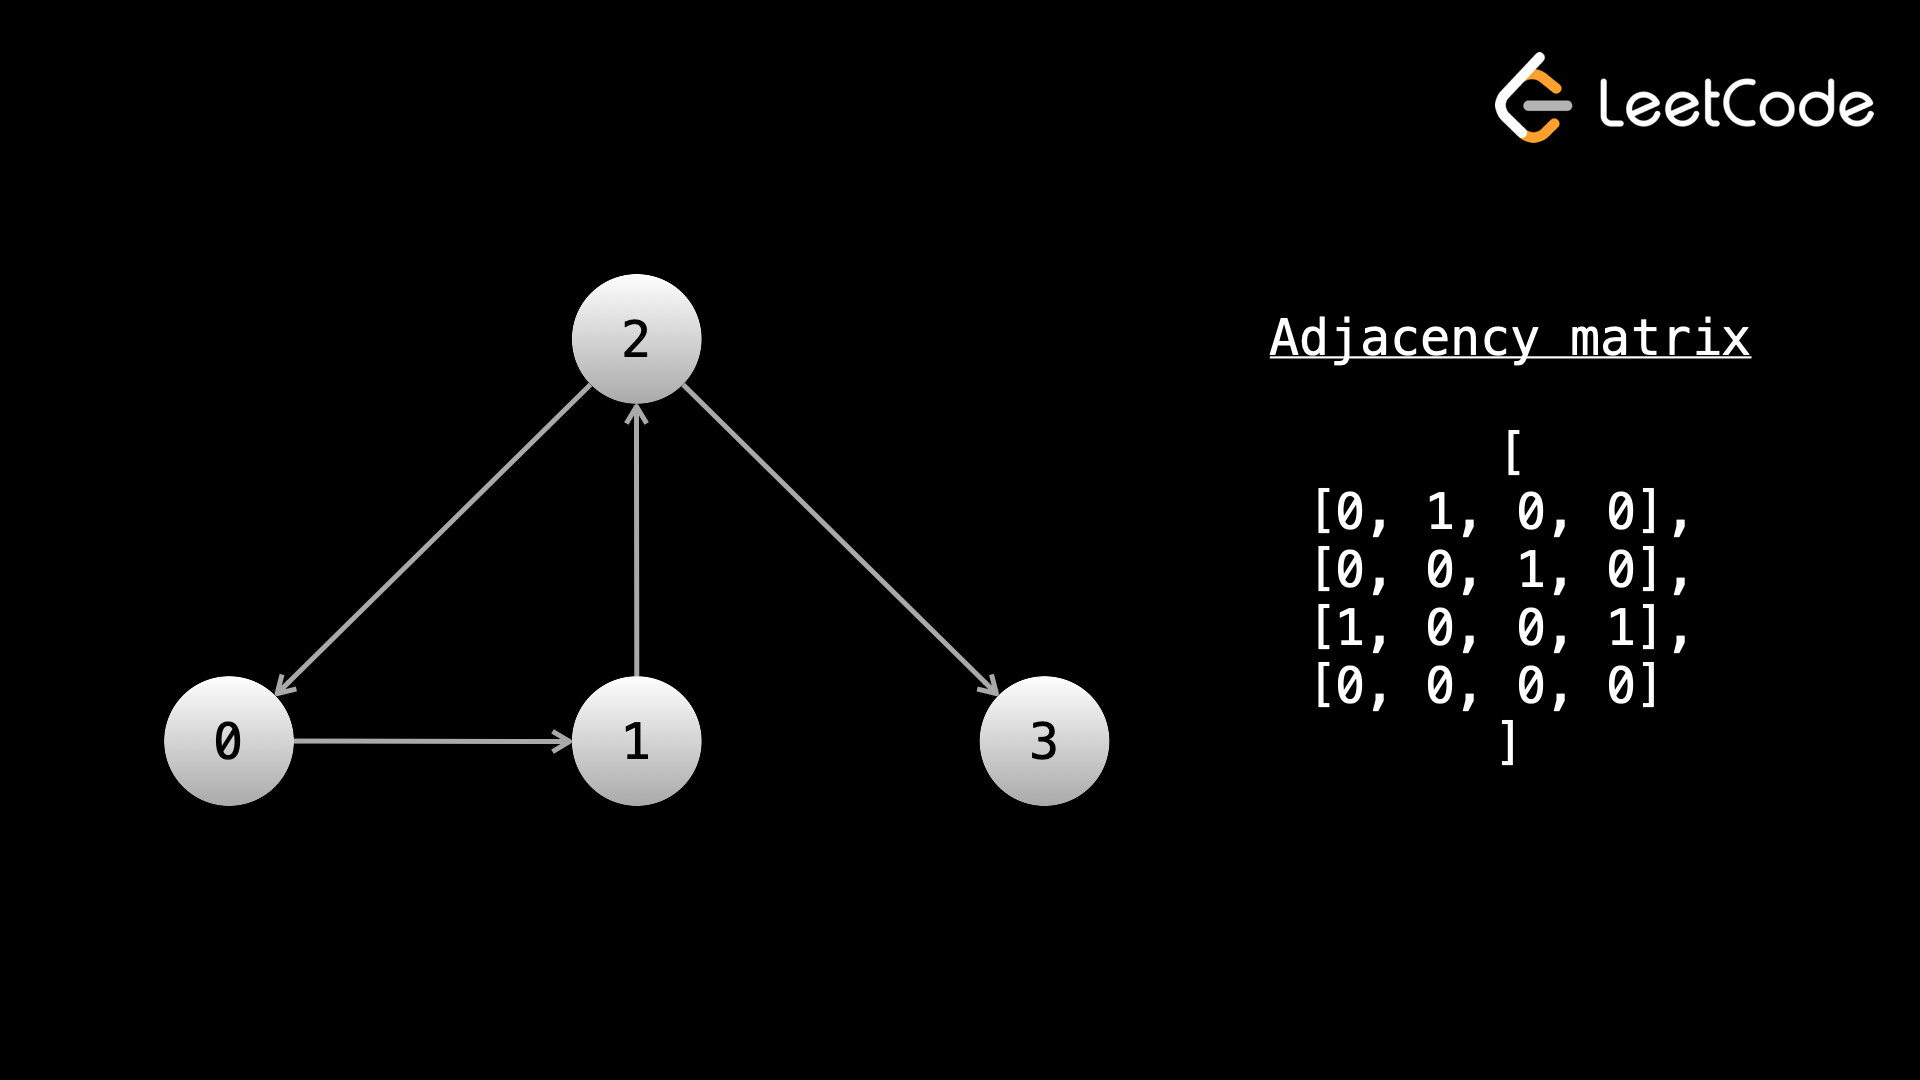

When given this format, you have two options. 
- During the traversal, at any given node you can iterate over graph[node], and if graph[node][i] == 1, then you know that node i is a neighbor. 
- Alternatively, you can pre-process the graph as we did with an array of edges. Build a hash map and then iterate over the entire graph. If graph[i][j] == 1, then put j in the list associated with graph[i]. Both of these approaches will have a time complexity of O(n^2)

# Last input format: matrix

The last format we'll talk about is more subtle but very common. The input will be a 2D matrix and the problem will describe a story. Each square will represent something, and the squares will be connected in some way. For example, "Each square of the matrix is a village. Villages trade with their neighboring villages, which are the villages directly above, to the left, to the right, or below them."

In this case, each square (row, col) of the matrix is a node, and the neighbors are (row - 1, col), (row, col - 1), (row + 1, col), (row, col + 1) (if in bounds).

# Code differences between graphs and trees


- Handling these cycles is important to avoid infinite loops.
- In a graph, we might need to convert the input into a hash map first
- When traversing a graph, we will need to use a for loop to iterate over the neighbors of the current node, since a node could have any number of neighbors.
- Implementation of DFS for graphs is similar to implementation for trees. Doing it recursively follows the same format: check for the base case, recursively call on all neighbors, do some logic to calculate the answer, and return the answer. You can also do it iteratively using a stack.

# Preventing Cycles

To prevent cycles and unnecessarily visiting a node more than once, we can use a set seen. Before we visit a node, we first check if the node is in seen. If it isn't, we add it to seen before visiting it. This allows us to only visit each node once in 
O(1) time because adding and checking for existence in a set takes constant time.

Example 1: 547. Number of Provinces

In [ ]:
# Ex1 num of provinces official solution 
from collections import defaultdict

class Solution:
    def findCircleNum(self, isConnected: List[List[int]]) -> int:
        def dfs(node):
            for neighbor in graph[node]:
                # the next 2 lines are needed to prevent cycles
                if neighbor not in seen:
                    seen.add(neighbor)
                    dfs(neighbor)
        
        # build the graph
        n = len(isConnected)   # n i the number of nodes (this works since the input is a matix input format)
        graph = defaultdict(list) # we will add list of neighbors for each node
        for i in range(n):
            for j in range(i + 1, n): # (REF 1) we start at i + 1 bc anything prior to that is a duplicate edge 
                                      # connection see markdown below for more information regarding this
                if isConnected[i][j]:  # in Python, 0 is considered as False, and any non-zero integer is considered as True in a Boolean context
                    graph[i].append(j) # thus if there is a non zero value in isConnected matrix we return true and do a 
                    graph[j].append(i) # bi directional connection
        
        seen = set()
        ans = 0
        
        for i in range(n):
            if i not in seen:
                # add all nodes of a connected component to the set
                ans += 1
                seen.add(i)
                dfs(i)
        
        return ans

## (REF1) gpt3's explanation for why we only need to consider the upper triangle for the adjacency matrix (why we have j in the range(i + 1))
The proof that we only need to consider the upper triangle of the isConnected matrix to capture all the edges in the graph is based on the fact that the matrix is symmetric.

Suppose we have a graph with n nodes and an n x n adjacency matrix A where A[i][j] = 1 if there is an edge between nodes i and j, and A[i][j] = 0 otherwise. Since the graph is undirected, the matrix is symmetric, i.e., A[i][j] = A[j][i] for all i and j.

To see why we only need to consider the upper triangle of the matrix, observe that for any two nodes i and j, if there is an edge between them (i.e., A[i][j] = 1), then there is also an edge between j and i (i.e., A[j][i] = 1). Therefore, we only need to consider the edges in the upper triangle of the matrix (i.e., the entries A[i][j] where i < j) to capture all the edges in the graph.

This is because if we were to consider the edges in the lower triangle of the matrix (i.e., the entries A[i][j] where i > j), we would simply be considering the same set of edges as the upper triangle, but in reverse order.

Therefore, we can reduce the number of iterations in the inner loop by only considering the upper triangle of the matrix and using range(i+1, n) instead of range(n).